# Práctico 1 - Procesamiento Digital de Imágenes

# Pablo Nicolas Ramos
# linkedin: https://ar.linkedin.com/in/pablonicolasr

In [1]:
import imageio
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

[0.57254902 0.14117647 0.23921569]
float64
(521, 720, 3)


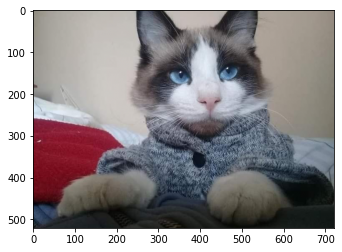

In [3]:
# Cargar la imagen
img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg")) / 255


# Mostrar la imagen
plt.imshow(img_rgb)

print(img_rgb[300, 150])

print(img_rgb.dtype)

print(img_rgb.shape)

In [4]:
canal_rojo = img_rgb[:,:,0]

print(canal_rojo[300, 150])

0.5725490196078431


## Seleccionar el canal rojo

[0.57254902 0.         0.        ]


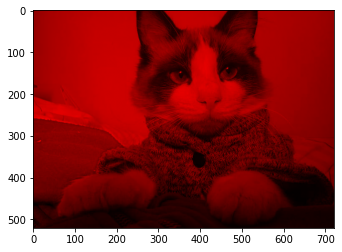

In [5]:
M = np.array([[1, 0, 0], # RED
              [0, 0, 0], 
              [0, 0, 0]])

img_canal_rojo = apply_matrix(img_rgb, M)

print(img_canal_rojo[300,150])

plt.imshow(img_canal_rojo)

# Seleccionar el canal verde

[0.         0.57254902 0.        ]


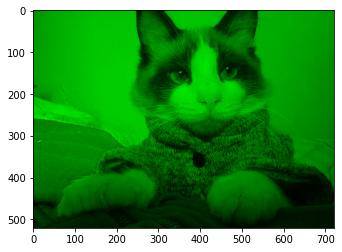

In [6]:
G = np.array([[0, 0, 0], 
              [1, 0, 0], # GREEN
              [0, 0, 0]])

img_canal_green = apply_matrix(img_rgb, G)

print(img_canal_green[300,150])

plt.imshow(img_canal_green)

# Seleccionar el canal azul

[0.         0.         0.57254902]


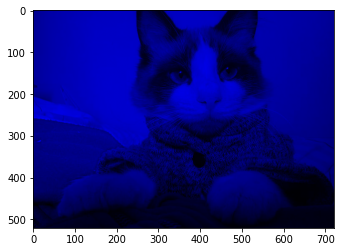

In [7]:
B = np.array([[0, 0, 0], 
              [0, 0, 0], 
              [1, 0, 0]]) #BLUE

img_canal_blue = apply_matrix(img_rgb, B)

print(img_canal_blue[300,150])

plt.imshow(img_canal_blue)

## Imagen en escala de grises

float64


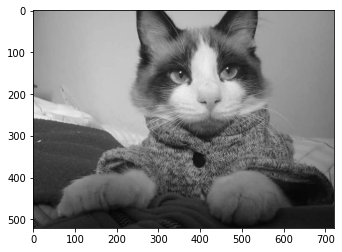

In [8]:
M_gray = np.ones((3,3))/3

img_gris = apply_matrix(img_rgb, M_gray)

print(img_gris.dtype)

plt.imshow(img_gris)

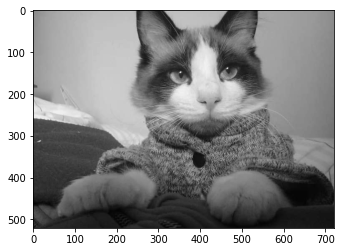

In [9]:
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, "gray")

## Otros mapas de colores

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

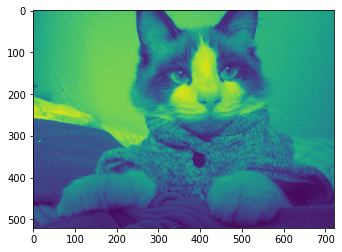

In [10]:
plt.imshow(img_gris_2)

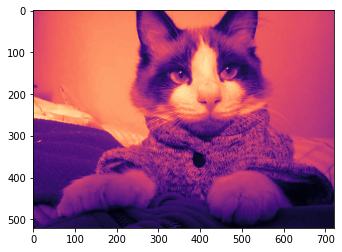

In [11]:
plt.imshow(img_gris_2, "magma")

## Matriz aleatoria

[[0.32882763 0.46265484 0.79108108]
 [0.88775099 0.59223938 0.8700948 ]
 [0.78227996 0.5706774  0.58057392]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

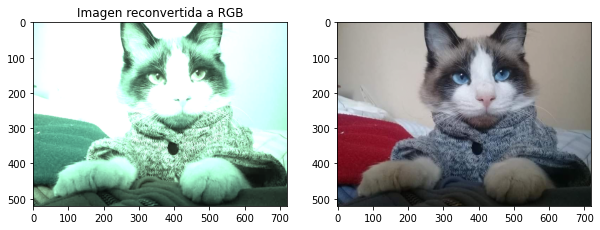

In [12]:
M_random = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M_random)

M_inv = np.linalg.inv(M_random)
img_random_inv = apply_matrix(img_random, M_inv)

print(M_random)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title("Matriz aleatoria")
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title("Imagen reconvertida a RGB")

## 1. Intercambiar los canales: R->G, G->B, B->R

Text(0.5, 1.0, 'SHELDON GBR')

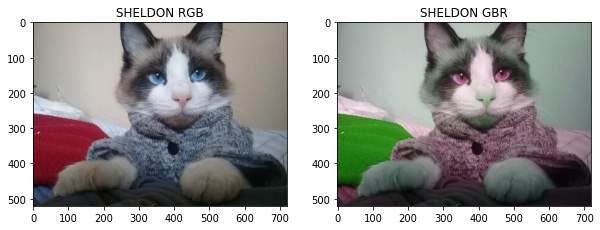

In [13]:
# Cargar la imagen
img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg")) / 255


img_swat = img_rgb[...,[2,0,1]].copy()


fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("SHELDON RGB")
axes[1].imshow(np.clip(img_swat, 0, 1))
axes[1].set_title("SHELDON GBR")

In [14]:
type(img_swat)

imageio.core.util.Array

## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

1. Convertir la imagen de RGB a YIQ

In [15]:
class ImageOperation:
    
    def __init__(self):
        
        self.yiq_from_rgb = np.array(
            [
                [0.299, 0.587, 0.114], 
                [0.59590059, -0.27455667, -0.32134392], 
                [0.21153661, -0.52273617, 0.31119955]
            ]
        )
        
        self.rgb_from_yiq = np.array(
            [
                [1, 0.9663, 0.6210], 
                [1, -0.2721, -0.6474], 
                [1, -0.1070, 1.7046]
            ]
        )
        
        self.alpha = 2.2
        
        self.beta = 0.77
        
        
    def RGBtoYIQ(self, img_rgb):
        
        """
        Converts an RGB image to YIQ color space
        :param imgRGB: An Image in RGB
        :return: A YIQ in image color space
        """
        
        initShape = img_rgb.shape       
        
        
        return np.dot(img_rgb.reshape(-1,3), self.yiq_from_rgb.transpose()).reshape(initShape)
    
    def clamping(self, arrayChannel):
        
        arrayChannel = np.clip(arrayChannel, np.min(arrayChannel), 1)
        
        return arrayChannel
    
    def rangeI(self, ci):
        
        ci = np.clip(ci, -0.5957, 0.5957)
        
        return ci
    
    def rangeQ(self, cq):
        
        cq = np.clip(cq, -0.5226, 0.5226)
        
        return cq   
        
    def multiplyByFactor(self, img_rgb):
        
        img_yiq = self.RGBtoYIQ(img_rgb)
        
        initShape = img_yiq.shape
        
        img_yiq_sep = img_yiq.reshape(-1,3)
        
        y = self.clamping(img_yiq_sep[:, 0] * self.alpha)
        
        i = self.rangeI(img_yiq_sep[:, 1] * self.beta)
        
        q = self.rangeQ(img_yiq_sep[:, 2] * self.beta)
        
        img_yiq = np.stack((y, i, q), axis = 1)
        
        return img_yiq.reshape(initShape)
    
    def YIQtoRGB(self, img_rgb):
        
        """
        Converts an RGB image to YIQ color space
        :param imgRGB: An Image in RGB
        :return: A YIQ in image color space
        """
        
        img_yiq = self.multiplyByFactor(img_rgb)
        
        initShape = img_yiq.shape   
        
        return np.dot(img_yiq.reshape(-1,3), self.rgb_from_yiq.transpose()).reshape(initShape)
    
    def truncRGB(self, img_rgb):
        
        imgRgb = self.YIQtoRGB(img_rgb)
        
        return np.clip(imgRgb, 0, 1)      

In [16]:
# Cargar la imagen
img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg")) / 255

img = ImageOperation()

Text(0.5, 1.0, 'PUNTO A')

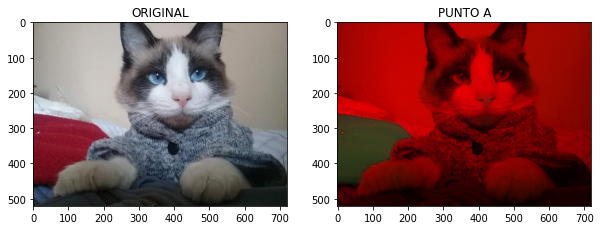

In [17]:
rgbToYiq = img.RGBtoYIQ(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(rgbToYiq, 0, 1))
axes[1].set_title("PUNTO A")

Text(0.5, 1.0, 'PUNTO B')

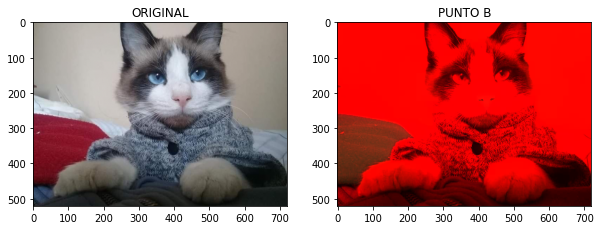

In [18]:
yiqMult = img.multiplyByFactor(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(yiqMult, 0, 1))
axes[1].set_title("PUNTO B")

Text(0.5, 1.0, 'PUNTO C')

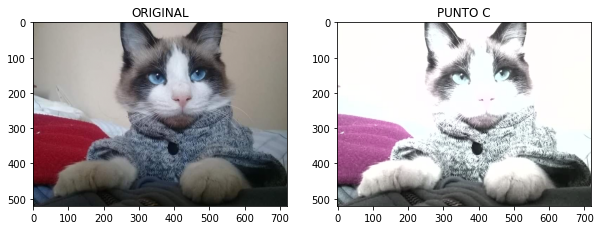

In [19]:
yiqRgb = img.YIQtoRGB(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(yiqRgb, 0, 1))
axes[1].set_title("PUNTO C")

Text(0.5, 1.0, 'PUNTO D')

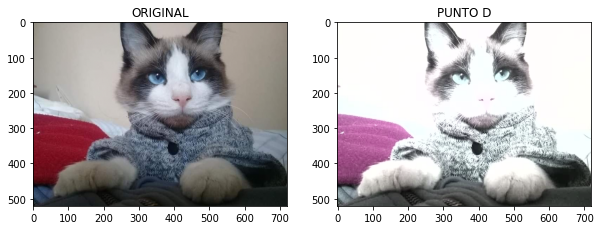

In [20]:
truncRGB = img.truncRGB(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(truncRGB, 0, 1))
axes[1].set_title("PUNTO D")

## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

<IPython.core.display.Javascript object>


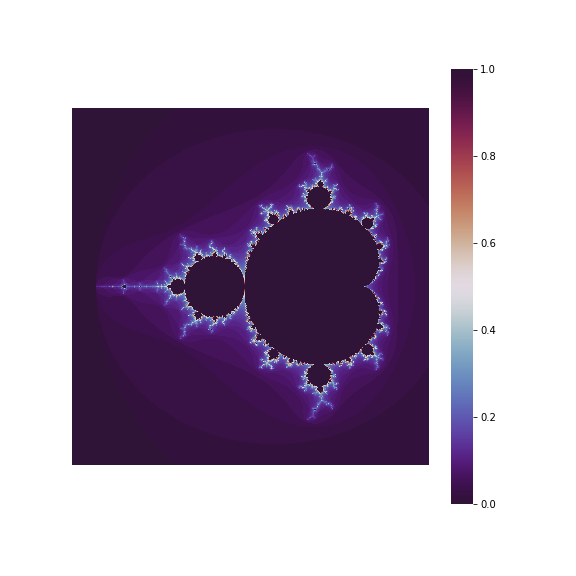

<AxesSubplot:>

In [21]:
import seaborn as sns
%matplotlib notebook

x = np.load("mandelbrot.npy", mmap_mode='r')

fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap="twilight_shifted", square=True, xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>


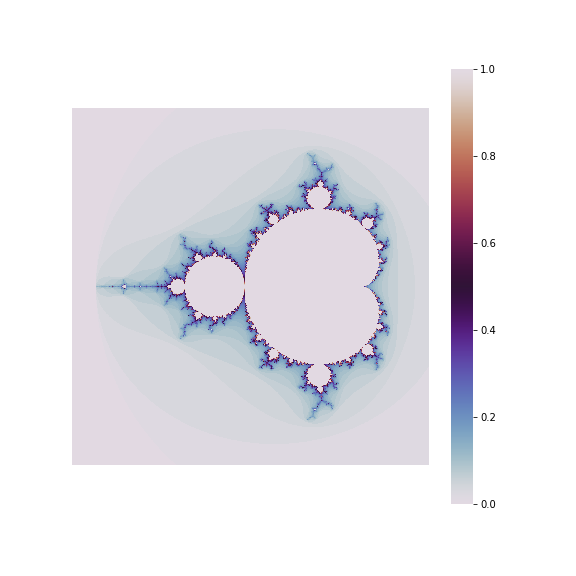

<AxesSubplot:>

In [24]:
y = np.load("mandelbrot.npy", mmap_mode='r')

fig = plt.figure(figsize=(8,8))

sns.heatmap(y, cmap="twilight", square=True, xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>


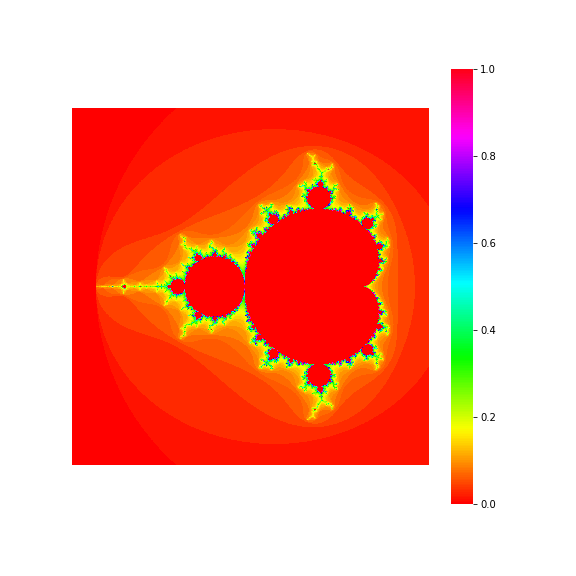

<AxesSubplot:>

In [25]:
z = np.load("mandelbrot.npy", mmap_mode='r')

fig = plt.figure(figsize=(8,8))

sns.heatmap(z, cmap="hsv", square=True, xticklabels=False, yticklabels=False)